## Forwards vs backwards trajectories

In this notebook I want to compare how the results differ if you run forwards vs backward trajectories on the LAVD field and the identified RCLVs.

What I will do:

1. Run 8 day forward trajectories for the same time as i have backwards trajectories from
2. identify RCLVs
3. compare eddy polarity between 2 versions

In [1]:
import os,sys
import trajan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from config import *

sys.path.append('./RCLVatlas')
from subfunctions_for_RCLV_atlas import read_RCLV_CSV_untracked,read_RCLV_CSV_tracked,save_RCLV_CSV
from mainfunctions_for_RCLV_atlas import *


/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## 8 day backwards and forwards LAVD

In [2]:
b_lavd_path='/work/bk1377/b382618/RCLVs/8day/LAVD/20100720_LAVD_8days_runtime_20min_timestep_particle_start_lat_10.0_40.0_lon_180.0_210.0_spatial_step_0.03125_6hr_output_freq.npy'
f_lavd_path = "/work/bk1377/b382618/RCLVs/f8day/LAVD/20100712_LAVD_8days_runtime_20min_timestep_particle_start_lat_10.0_40.0_lon_180.0_210.0_spatial_step_0.03125_6hr_output_freq.npy"

## Side by side

In [4]:
path_list= [b_lavd_path, f_lavd_path]
path_list

['/work/bk1377/b382618/RCLVs/8day/LAVD/20100720_LAVD_8days_runtime_20min_timestep_particle_start_lat_10.0_40.0_lon_180.0_210.0_spatial_step_0.03125_6hr_output_freq.npy',
 '/work/bk1377/b382618/RCLVs/f8day/LAVD/20100712_LAVD_8days_runtime_20min_timestep_particle_start_lat_10.0_40.0_lon_180.0_210.0_spatial_step_0.03125_6hr_output_freq.npy']

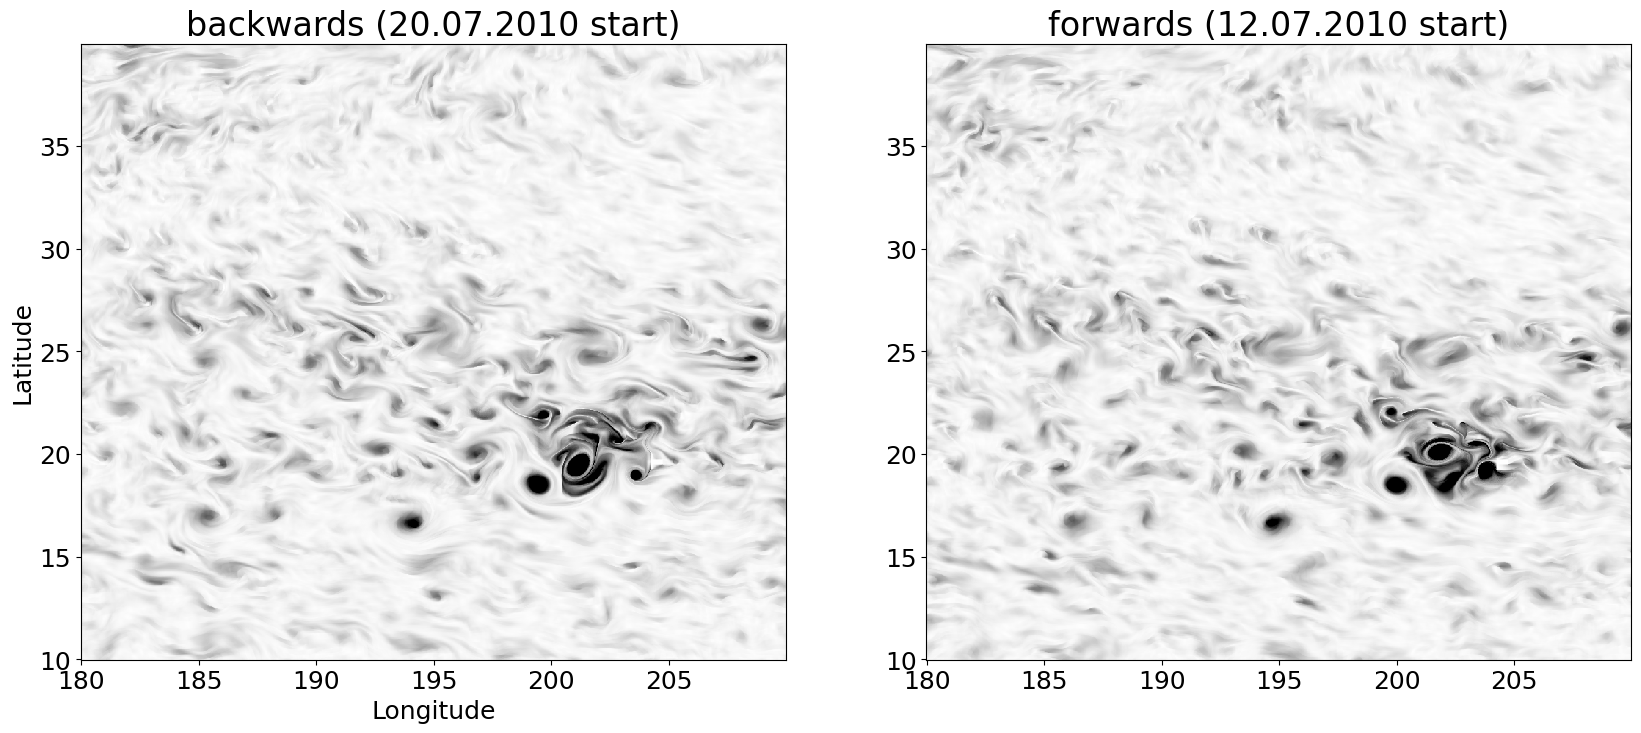

In [5]:
fontsize = 18
fig,ax = plt.subplots(1,2,figsize=(20,8))

ax[0].set_xlabel('Longitude',fontsize=fontsize)
ax[0].set_ylabel('Latitude',fontsize=fontsize)


# Load the LAVD data
LAVD = np.load(b_lavd_path)
LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #Land mask required for the peak_local_max function to work
LAVD_reshape = np.transpose(np.reshape(LAVD,(len(traj_lon_array),len(traj_lat_array))))

# Plot the LAVD 
plot = ax[0].pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));
ax[0].tick_params(axis='both', which='major', labelsize=fontsize)
ax[0].set_title('backwards (20.07.2010 start)',fontsize=24)


LAVD = np.load(f_lavd_path)
LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #Land mask required for the peak_local_max function to work
LAVD_reshape = np.transpose(np.reshape(LAVD,(len(traj_lon_array),len(traj_lat_array))))

# Plot the LAVD 
plot = ax[1].pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));
ax[1].tick_params(axis='both', which='major', labelsize=fontsize)
ax[1].set_title('forwards (12.07.2010 start)',fontsize=24)

plt.show()

## RCLVs forwards and backwards

In [2]:
## forwards eddies 12.07.2010

f_eddies_dir = "/work/bk1377/b382618/RCLVs/f8day/RCLV_dir/RCLV_20100423_20101219_atlas.csv"
b_eddies_dir = "/work/bk1377/b382618/RCLVs/8day/RCLV_dir/RCLV_20100501_20101227_atlas.csv"

In [3]:
# open as csv file which is a list of lists

back_data = []
with open(b_eddies_dir) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    i = 0
    for row in csv_reader:
        if i == 0:
            back_data.append(row)
        else:
            #reformat so that everything except for the date and orientation is a float
            back_data.append([row[0],float(row[1]),row[2]] + [float(i) for i in row[3:]])
        i += 1

In [4]:
# open as csv file which is a list of lists

for_data = []
with open(f_eddies_dir) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    i = 0
    for row in csv_reader:
        if i == 0:
            for_data.append(row)
        else:
            #reformat so that everything except for the date and orientation is a float
            for_data.append([row[0],float(row[1]),row[2]] + [float(i) for i in row[3:]])
        i += 1

In [8]:
len(for_data) ## forwards eddies ds

1024

In [9]:
len(back_data)

888

## This is if you need to sub-select

In [15]:
# import csv

# # Open the CSV file
# with open(b_eddies_dir, mode='r') as file:
#     reader = csv.reader(file)
    
#     # Iterate over the rows and select rows where the second value is 3
#     filtered_rows = [row for row in reader if row[0] == '20100720']  # Assuming values are stored as strings in CSV

# # Print or process the filtered rows
# for row in filtered_rows:
#     print(row)

In [6]:
## this is needed because the eulerian and lagrangian eddies have different longitude formats
def convert_longitude(lon):
    if lon > 180:
        return lon - 360
    return lon



ValueError: could not convert string to float: 'Boundary Coords'

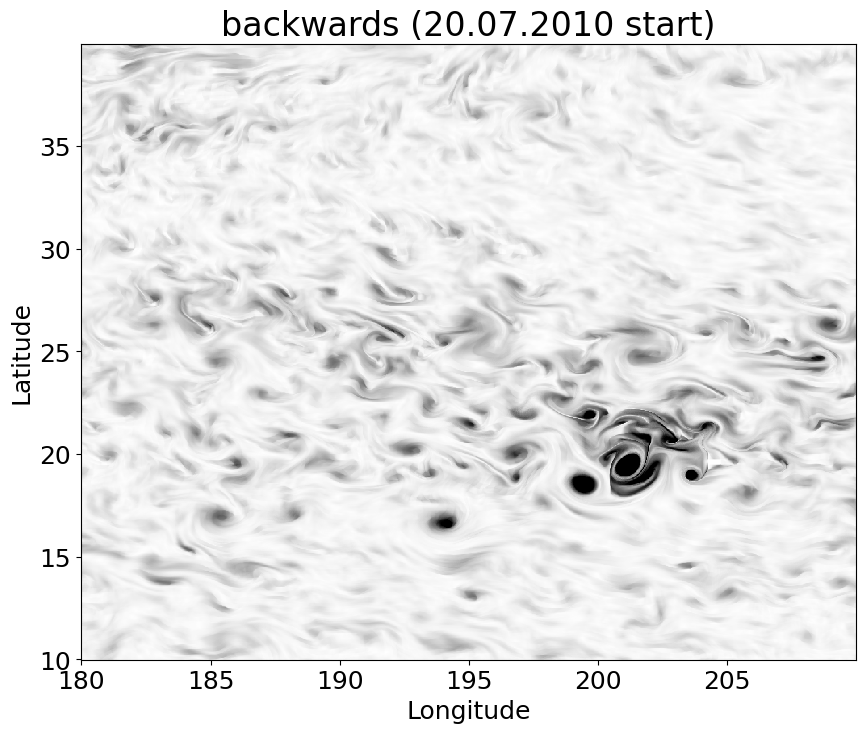

In [9]:
fontsize = 18
fig,ax = plt.subplots(figsize=(10,8))

ax.set_xlabel('Longitude',fontsize=fontsize)
ax.set_ylabel('Latitude',fontsize=fontsize)


# Plot the LAVD 
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_title('RCLVs contours',fontsize=24)


# Load the LAVD data
LAVD = np.load(b_lavd_path)
LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #Land mask required for the peak_local_max function to work
LAVD_reshape = np.transpose(np.reshape(LAVD,(len(traj_lon_array),len(traj_lat_array))))

# Plot the LAVD 
plot = ax.pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_title('backwards (20.07.2010 start)',fontsize=24)


# Plot the RCLVs for the given date

RCLV_bnds = [r[9:] for r in back_data] # boundary coordinates
# RCLV_bnds = RCLV_bnds[1:]
RCLV_orientations = [r[2] for r in back_data] # eddy polarity
# RCLV_orientations = RCLV_orientations[1:]



for i in np.arange(0,len(RCLV_bnds)):
    x_bnds = [(float(coord)) for coord in RCLV_bnds[i][0::2]]
    y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]
    

    if RCLV_orientations[i] == 'anti':
        color = '#FF0000'
    else:
        color = '#4242FF'
    ax.plot(x_bnds,y_bnds,linewidth=2,c=color)
    s=filtered_rows[i][0]
    x=x_bnds[0]
    y=y_bnds[0]
    ax.text(x,y, s=s)

plt.show()

NameError: name 'b_lavd_path' is not defined

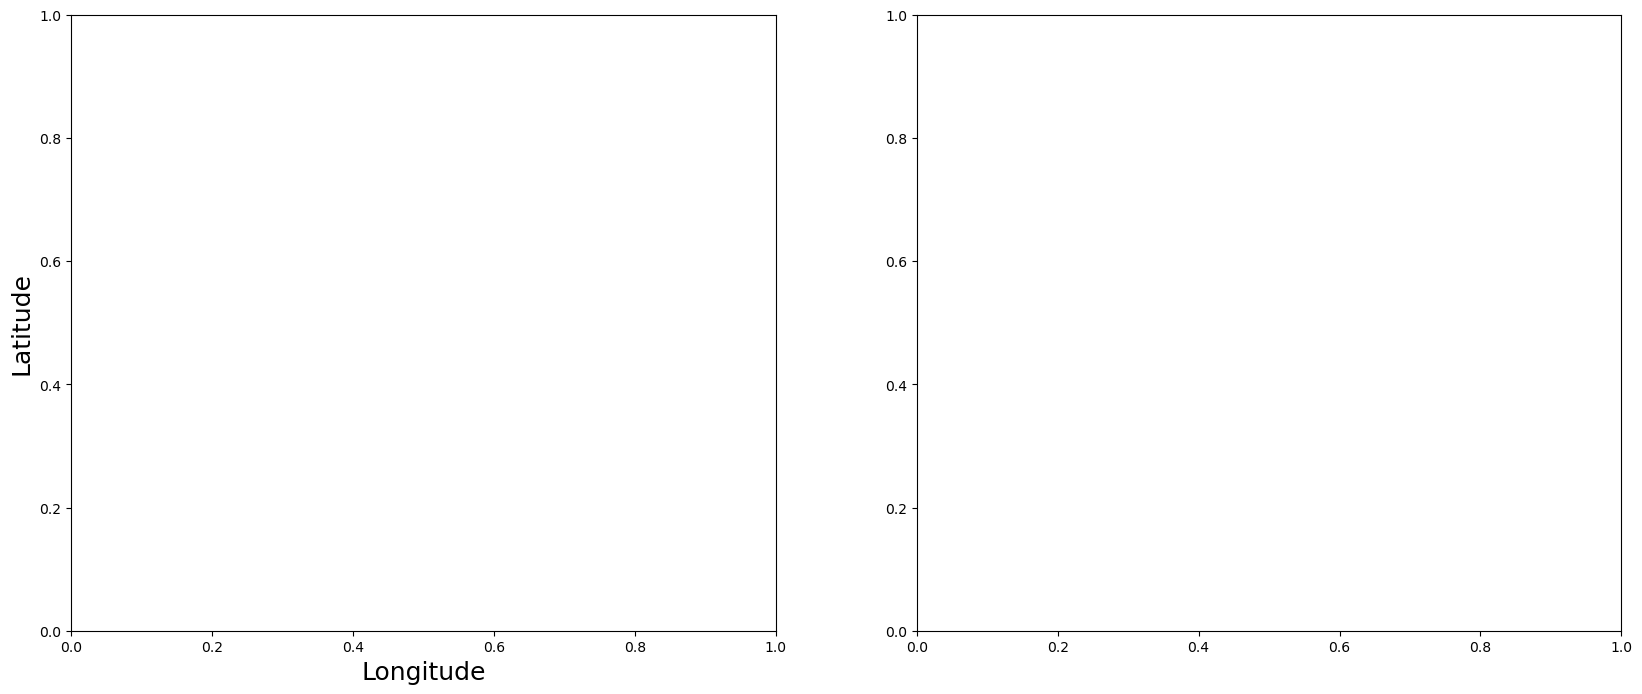

In [10]:
fontsize = 18
fig,ax = plt.subplots(1,2,figsize=(20,8))

ax[0].set_xlabel('Longitude',fontsize=fontsize)
ax[0].set_ylabel('Latitude',fontsize=fontsize)


# Load the LAVD data
LAVD = np.load(b_lavd_path)
LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #Land mask required for the peak_local_max function to work
LAVD_reshape = np.transpose(np.reshape(LAVD,(len(traj_lon_array),len(traj_lat_array))))

# Plot the LAVD 
plot = ax[0].pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));
ax[0].tick_params(axis='both', which='major', labelsize=fontsize)
ax[0].set_title('backwards (20100501-20100906)',fontsize=24)


RCLV_bnds = [r[9:] for r in back_data] # boundary coordinates
RCLV_bnds = RCLV_bnds[1:]
RCLV_orientations = [r[2] for r in back_data] # eddy polarity
RCLV_orientations = RCLV_orientations[1:]



for i in np.arange(0,len(RCLV_bnds)):
    x_bnds = [(float(coord)) for coord in RCLV_bnds[i][0::2]]
    y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]
    

    if RCLV_orientations[i] == 'anti':
        color = '#FF0000'
    else:
        color = '#4242FF'
    ax[0].plot(x_bnds,y_bnds,linewidth=2,c=color)
    # s=filtered_rows[i][0]
    # x=x_bnds[0]
    # y=y_bnds[0]
    # ax.text(x,y, s=s)



LAVD = np.load(f_lavd_path)
LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #Land mask required for the peak_local_max function to work
LAVD_reshape = np.transpose(np.reshape(LAVD,(len(traj_lon_array),len(traj_lat_array))))

# Plot the LAVD 
plot = ax[1].pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));
ax[1].tick_params(axis='both', which='major', labelsize=fontsize)
ax[1].set_title('forwards (20100423-20100829)',fontsize=24)


RCLV_bnds = [r[9:] for r in for_data] # boundary coordinates
RCLV_bnds = RCLV_bnds[1:]
RCLV_orientations = [r[2] for r in for_data] # eddy polarity
RCLV_orientations = RCLV_orientations[1:]



for i in np.arange(0,len(RCLV_bnds)):
    x_bnds = [(float(coord)) for coord in RCLV_bnds[i][0::2]]
    y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]
    

    if RCLV_orientations[i] == 'anti':
        color = '#FF0000'
    else:
        color = '#4242FF'
    ax[1].plot(x_bnds,y_bnds,linewidth=2,c=color)
    # s=filtered_rows[i][0]
    # x=x_bnds[0]
    # y=y_bnds[0]
    # ax.text(x,y, s=s)



plt.show()

## RCLV stats forwards and backwards

In [5]:
## some pretty complicated chatgpt code but it works and fast.
# I can't just open the csv as panda because all the lists have different 
#lengths because the boundary points are different. slay.

#open as pandas df 

processed_data = []
with open(b_eddies_dir, 'r') as file:
    for line in file:
        # Step 2: Split the line into individual entries (assuming comma as delimiter)
        row = line.strip().split(',')

        # Step 3: Process each row to split into first 9 entries and the rest
        first_9 = row[:9]  # First 9 entries
        rest = row[9:]     # The remaining entries
        processed_data.append(first_9 + [rest])  # Add the rest as a list to the last column

# Step 4: Create a DataFrame with the transformed data
columns = [f"Col_{i+1}" for i in range(9)] + ['Extra_Entries']
back_df = pd.DataFrame(processed_data, columns=columns)
back_df

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Extra_Entries
0,Date,RCLV ID,Orientation,Age (days),Area (km^2),Center Lon,Center Lat,CD,flag,[Boundary Coords]
1,20101227,1,anti,8,12097.756156336915,198.90625,17.5,0.010975614799365103,0,"[198.875, 18.03125, 198.875, 18.03125, 198.906..."
2,20101227,2,anti,8,27114.847655804504,196.875,19.78125,0.019817227819358567,0,"[197.15625, 20.46875, 197.1875, 20.46875, 197...."
3,20101227,3,cyc,8,2267.1577946098564,202.21875,18.96875,0.029380798440870153,0,"[202.53125, 19.21875, 202.53125, 19.21875, 202..."
4,20101227,4,anti,8,2669.9525398963337,203.6875,18.625,0.01569753872615227,0,"[203.875, 19.03125, 203.875, 19.03125, 203.906..."
...,...,...,...,...,...,...,...,...,...,...
883,20100501,734,cyc,8,4050.367309173777,203.0,13.8125,0.020480963406706094,0,"[202.71875, 14.0625, 202.71875, 14.0625, 202.7..."
884,20100501,735,cyc,8,1331.3692930235725,198.71875,11.21875,0.029259453558745124,0,"[198.9375, 11.28125, 198.96875, 11.28125, 199...."
885,20100501,736,anti,8,1507.2934440159963,206.65625,37.96875,0.020097584026386946,0,"[206.6875, 38.15625, 206.6875, 38.15625, 206.7..."
886,20100501,737,cyc,8,1059.6681667786372,190.21875,32.96875,0.01932320518299782,0,"[190.21875, 33.125, 190.21875, 33.125, 190.25,..."


In [7]:
back_df.columns = back_df.iloc[0].astype(str)  # Convert the first row to strings and set as columns
back_df = back_df[1:].reset_index(drop=True)

In [13]:
back_df

,Date,RCLV ID,Orientation,Age (days),Area (km^2),Center Lon,Center Lat,CD,flag,['Boundary Coords']
0,20101227,1,anti,8,12097.756156336915,198.90625,17.5,0.010975614799365103,0,"[198.875, 18.03125, 198.875, 18.03125, 198.906..."
1,20101227,2,anti,8,27114.847655804504,196.875,19.78125,0.019817227819358567,0,"[197.15625, 20.46875, 197.1875, 20.46875, 197...."
2,20101227,3,cyc,8,2267.1577946098564,202.21875,18.96875,0.029380798440870153,0,"[202.53125, 19.21875, 202.53125, 19.21875, 202..."
3,20101227,4,anti,8,2669.9525398963337,203.6875,18.625,0.01569753872615227,0,"[203.875, 19.03125, 203.875, 19.03125, 203.906..."
4,20101227,5,cyc,8,2117.5796952734313,191.40625,22.90625,0.02002432062186514,0,"[191.3125, 23.15625, 191.34375, 23.15625, 191...."
...,...,...,...,...,...,...,...,...,...,...
882,20100501,734,cyc,8,4050.367309173777,203.0,13.8125,0.020480963406706094,0,"[202.71875, 14.0625, 202.71875, 14.0625, 202.7..."
883,20100501,735,cyc,8,1331.3692930235725,198.71875,11.21875,0.029259453558745124,0,"[198.9375, 11.28125, 198.96875, 11.28125, 199...."
884,20100501,736,anti,8,1507.2934440159963,206.65625,37.96875,0.020097584026386946,0,"[206.6875, 38.15625, 206.6875, 38.15625, 206.7..."
885,20100501,737,cyc,8,1059.6681667786372,190.21875,32.96875,0.01932320518299782,0,"[190.21875, 33.125, 190.21875, 33.125, 190.25,..."


In [8]:
## some pretty complicated chatgpt code but it works and fast.
# I can't just open the csv as panda because all the lists have different 
#lengths because the boundary points are different. slay.

#open as pandas df 

processed_data = []
with open(f_eddies_dir, 'r') as file:
    for line in file:
        # Step 2: Split the line into individual entries (assuming comma as delimiter)
        row = line.strip().split(',')

        # Step 3: Process each row to split into first 9 entries and the rest
        first_9 = row[:9]  # First 9 entries
        rest = row[9:]     # The remaining entries
        processed_data.append(first_9 + [rest])  # Add the rest as a list to the last column

# Step 4: Create a DataFrame with the transformed data
columns = [f"Col_{i+1}" for i in range(9)] + ['Extra_Entries']
for_df = pd.DataFrame(processed_data, columns=columns)
for_df

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Extra_Entries
0,Date,RCLV ID,Orientation,Age (days),Area (km^2),Center Lon,Center Lat,CD,flag,[Boundary Coords]
1,20101219,1,anti,8,14945.151349289734,199.28125,17.25,0.014490149568967122,0,"[199.75, 17.75, 199.78125, 17.75, 199.8125, 17..."
2,20101219,2,anti,8,21682.26019100818,197.25,19.8125,0.010560300102951227,0,"[197.71875, 20.5, 197.75, 20.5, 197.78125, 20...."
3,20101219,3,cyc,8,11143.132862595397,201.75,19.15625,0.019728490784163343,0,"[201.25, 19.6875, 201.25, 19.6875, 201.28125, ..."
4,20101219,4,cyc,8,10567.815406479065,191.625,22.53125,0.02180304311014088,0,"[191.28125, 23.0625, 191.3125, 23.03125, 191.3..."
...,...,...,...,...,...,...,...,...,...,...
1019,20100423,983,anti,8,1649.180477027173,204.0625,15.1875,0.01930583901396656,0,"[204.125, 15.34375, 204.125, 15.34375, 204.156..."
1020,20100423,984,cyc,8,3021.2958551073434,189.84375,15.25,0.019553098253640117,0,"[190.0625, 15.46875, 190.09375, 15.46875, 190...."
1021,20100423,985,cyc,8,1617.4613219418866,208.28125,29.21875,0.010097035409791504,0,"[208.34375, 29.40625, 208.375, 29.40625, 208.4..."
1022,20100423,986,cyc,8,1353.3144212460827,192.4375,14.59375,0.029885578304119934,0,"[192.34375, 14.875, 192.375, 14.84375, 192.375..."


In [9]:
for_df.columns = for_df.iloc[0].astype(str)  # Convert the first row to strings and set as columns
for_df = for_df[1:].reset_index(drop=True)

Now I want to compare the number of cyclones and anticyclones in each dataset.

THe plot aaron wanted would require me to look at the vorticity but i can just look at what I have

In [12]:
for_df

,Date,RCLV ID,Orientation,Age (days),Area (km^2),Center Lon,Center Lat,CD,flag,['Boundary Coords']
0,20101219,1,anti,8,14945.151349289734,199.28125,17.25,0.014490149568967122,0,"[199.75, 17.75, 199.78125, 17.75, 199.8125, 17..."
1,20101219,2,anti,8,21682.26019100818,197.25,19.8125,0.010560300102951227,0,"[197.71875, 20.5, 197.75, 20.5, 197.78125, 20...."
2,20101219,3,cyc,8,11143.132862595397,201.75,19.15625,0.019728490784163343,0,"[201.25, 19.6875, 201.25, 19.6875, 201.28125, ..."
3,20101219,4,cyc,8,10567.815406479065,191.625,22.53125,0.02180304311014088,0,"[191.28125, 23.0625, 191.3125, 23.03125, 191.3..."
4,20101219,5,anti,8,2424.822345905425,201.15625,20.46875,0.02017046046403334,0,"[201.5, 20.78125, 201.5, 20.75, 201.5, 20.75, ..."
...,...,...,...,...,...,...,...,...,...,...
1018,20100423,983,anti,8,1649.180477027173,204.0625,15.1875,0.01930583901396656,0,"[204.125, 15.34375, 204.125, 15.34375, 204.156..."
1019,20100423,984,cyc,8,3021.2958551073434,189.84375,15.25,0.019553098253640117,0,"[190.0625, 15.46875, 190.09375, 15.46875, 190...."
1020,20100423,985,cyc,8,1617.4613219418866,208.28125,29.21875,0.010097035409791504,0,"[208.34375, 29.40625, 208.375, 29.40625, 208.4..."
1021,20100423,986,cyc,8,1353.3144212460827,192.4375,14.59375,0.029885578304119934,0,"[192.34375, 14.875, 192.375, 14.84375, 192.375..."


In [16]:
b_counts = back_df['Orientation'].value_counts()
print(b_counts)

Orientation
anti    453
cyc     434
Name: count, dtype: int64


In [17]:
f_counts = for_df['Orientation'].value_counts()
print(f_counts)

Orientation
cyc     561
anti    462
Name: count, dtype: int64


How

In [14]:
b_cd = back_df['CD']
type(b_cd[0])

str

In [ ]:
f_counts = for_df['Orientation'].value_counts()
print(b_counts)

## IS THE CD=-0.5 CORRECT OR SHOULD IT BE CD=0.5